# Group Project

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [105]:
s_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')
s_2012.info()

C:\Users\reo_c\AppData\Local\Temp\ipykernel_31140\1851975636.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  s_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037205 non-null  int64  
 1   fiscal_year               1037205 non-null  int64  
 2   fiscal_month              1037205 non-null  int64  
 3   calendar_year             1037205 non-null  int64  
 4   calendar_month            1037205 non-null  int64  
 5   calendar_day              1037205 non-null  int64  
 6   company_code              1037205 non-null  int64  
 7   customer_code             1037205 non-null  object 
 8   customer_district_code    1037205 non-null  int64  
 9   item_code                 1037205 non-null  object 
 10  business_area_code        1037205 non-null  object 
 11  item_group_code           1037205 non-null  object 
 12  item_class_code           1037205 non-null  object 
 13  item_type                 1

In [106]:
s_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')
s_2013.info()

C:\Users\reo_c\AppData\Local\Temp\ipykernel_31140\2166878608.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  s_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accounting_date           951177 non-null  int64  
 1   fiscal_year               951177 non-null  int64  
 2   fiscal_month              951177 non-null  int64  
 3   calendar_year             951177 non-null  int64  
 4   calendar_month            951177 non-null  int64  
 5   calendar_day              951177 non-null  int64  
 6   company_code              951177 non-null  int64  
 7   customer_code             951177 non-null  object 
 8   customer_district_code    951177 non-null  int64  
 9   item_code                 951177 non-null  object 
 10  business_area_code        951177 non-null  object 
 11  item_group_code           951177 non-null  object 
 12  item_class_code           951177 non-null  object 
 13  item_type                 951177 non-null  i

In [107]:
# Compare data types between s_2012 and s_2013
print("Comparing data types between s_2012 and s_2013:")
print("\nColumns with different data types:")
for col in s_2012.columns:
    if s_2012[col].dtype != s_2013[col].dtype:
        print(f"\n{col}:")
        print(f"s_2012 dtype: {s_2012[col].dtype}")
        print(f"s_2013 dtype: {s_2013[col].dtype}")


Comparing data types between s_2012 and s_2013:

Columns with different data types:

customer_order_number:
s_2012 dtype: int64
s_2013 dtype: object


In [108]:
s_2012['customer_order_number'] = s_2012['customer_order_number'].astype(str)
s_2012.shape

(1037205, 41)

In [109]:
# Check if columns match exactly
columns_match = set(s_2012.columns) == set(s_2013.columns)
print("\nThe columns of two dataframes match exactly:", columns_match)

# Find any differences in columns if they exist
if not columns_match:
    print("\nColumns unique to s_2012:", set(s_2012.columns) - set(s_2013.columns))
    print("Columns unique to s_2013:", set(s_2013.columns) - set(s_2012.columns))



The columns of two dataframes match exactly: True


In [110]:
combined = pd.concat([s_2012, s_2013], ignore_index=True)

In [111]:
combined.shape

(1988382, 41)

In [112]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

## Section 1: Clean the Dataset

### Handle missing values

In [113]:
combined.isnull().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

In [114]:
# Investigate on 'item_source_class'
item_source_col = combined['item_source_class'].unique()
item_source_col

array([nan])

In [115]:
# drop 'item_source_class' column
combined = combined.drop('item_source_class', axis=1)

In [116]:
# Convert categorical column to string type
targeted_cols = ['company_code','customer_district_code','item_type','item_code','invoice_number','line_number']
combined[targeted_cols] = combined[targeted_cols].astype(str)

### Handle Datetime Columns

In [117]:
date_cols = ['accounting_date', 'invoice_date', 'order_date']

# Convert to string first, if necessary
combined[date_cols] = combined[date_cols].astype(int).astype(str)

# Convert each date column to datetime format
for col in date_cols:
    combined[col] = pd.to_datetime(combined[col], format='%Y%m%d', errors='coerce')

In [118]:
combined.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_date,order_date
count,1988382,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382,1988382
mean,2012-12-19 08:25:48.122643712,2012.9679,6.5248,2012.4784,6.3989,15.4622,409.8476,263.8138,27.1802,0.0244,2012-12-19 08:25:48.122643712,2012-12-15 16:19:19.266981120
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,-793541.9800,-141469.5200,-45000.0000,0.0000,2012-01-02 00:00:00,2009-03-26 00:00:00
25%,2012-06-19 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,23.0000,9.3810,2.0000,0.0000,2012-06-19 00:00:00,2012-06-15 00:00:00
50%,2012-12-06 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,67.5000,31.0700,6.0000,0.0000,2012-12-06 00:00:00,2012-12-04 00:00:00
75%,2013-06-20 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,197.7000,101.9106,20.0000,0.0000,2013-06-20 00:00:00,2013-06-18 00:00:00
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,793541.9800,777669.2000,105000.0000,1.0000,2013-12-31 00:00:00,2013-12-30 00:00:00
std,NaN,0.7120,3.6209,0.4995,3.2515,8.6849,2935.1795,2050.5140,329.4667,0.1543,NaN,NaN


#### Add new column, 'month_year', in 'mmm-yy' format

In [119]:
combined['month_year'] = combined['accounting_date'].dt.strftime('%b-%y')

In [120]:
combined.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,month_year
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0000,0,AUD,2217887,1,2012-05-09,2865354,2012-05-09,49:58.7,May-12
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0000,0,AUD,2185745,1,2012-02-16,2833515,2012-02-16,49:58.7,Feb-12
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0000,0,AUD,2217807,1,2012-05-09,2864857,2012-05-08,49:58.7,May-12
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0000,0,AUD,2222758,1,2012-05-18,2869759,2012-05-18,49:58.7,May-12
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0000,0,AUD,2170374,1,2012-01-09,2819189,2012-01-09,49:58.7,Jan-12


### Handle Categorical Attributes

Checking the unique values of each attribute

In [121]:
# Select categorical columns (string/object columns)
cat_cols = combined.select_dtypes(include=['object']).columns

In [122]:
# Count no. of unique values
for col in cat_cols:
    print(f'{col} unique values:', combined[col].nunique())

company_code unique values: 10
customer_code unique values: 7241
customer_district_code unique values: 17
item_code unique values: 34472
business_area_code unique values: 28
item_group_code unique values: 614
item_class_code unique values: 204
item_type unique values: 9
bonus_group_code unique values: 2
environment_group_code unique values: 9
technology_group_code unique values: 103
commission_group_code unique values: 3
reporting_classification unique values: 2
light_source unique values: 3
warehouse_code unique values: 59
abc_class_code unique values: 10
abc_class_volume unique values: 10
business_chain_l1_code unique values: 48
business_chain_l1_name unique values: 43
contact_method_code unique values: 1665
salesperson_code unique values: 271
order_type_code unique values: 37
market_segment unique values: 1
currency unique values: 6
invoice_number unique values: 619292
line_number unique values: 142
customer_order_number unique values: 661310
dss_update_time unique values: 1
month_y

In [123]:
# Display the attributes that has less than 50 uniques values
for col in cat_cols:
    unique_values = combined[col].unique()
    
    # Print only if the column has less than 10 unique values
    if len(unique_values) < 50:
        print(f'{col} unique values ({len(unique_values)}): {unique_values}')
        print()

company_code unique values (10): ['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']

customer_district_code unique values (17): ['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']

business_area_code unique values (28): ['LMP                           ' 'FLD                           '
 'OTH                           ' 'SUR                           '
 'COM                           ' 'DLT                           '
 'TRO                           ' 'URB                           '
 'HLB                           ' 'SAE                           '
 'RWY                           ' 'LCP                           '
 'PEN                           ' 'EXL                           '
 'TAL                           ' '945' '950' '980' '920' '960' '910'
 '930' '999' '970' '940' '985' 'IAE                           '
 'IAI                           ']

item_type unique values (9): ['5' '1' '7' '8' '6' '4' '2' '9' '3']

bonus_gro

There are many elements that have spaces containing in the attribute, so we're going to remove them.

In [74]:
# Remove all elements are strings and then strip leading and trailing spaces
combined[cat_cols] = combined[cat_cols].apply(lambda x: x.astype(str).str.strip())

In [75]:
# Display the attributes that has less than 50 uniques values
for col in cat_cols:
    unique_values = combined[col].unique()
    
    # Print only if the column has less than 10 unique values
    if len(unique_values) < 50:
        print(f'{col} unique values ({len(unique_values)}): {unique_values}')
        print()

company_code unique values (10): ['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']

customer_district_code unique values (17): ['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']

business_area_code unique values (28): ['LMP' 'FLD' 'OTH' 'SUR' 'COM' 'DLT' 'TRO' 'URB' 'HLB' 'SAE' 'RWY' 'LCP'
 'PEN' 'EXL' 'TAL' '945' '950' '980' '920' '960' '910' '930' '999' '970'
 '940' '985' 'IAE' 'IAI']

item_type unique values (9): ['5' '1' '7' '8' '6' '4' '2' '9' '3']

bonus_group_code unique values (2): ['Trade' 'Professional']

environment_group_code unique values (9): ['S' 'P' 'D' 'Z' 'C' 'M' 'R' 'I' 'NA']

commission_group_code unique values (3): ['NET_SALES' 'REBATE_EXEMPT_EOL' 'REBATE_EXEMPT_TP']

reporting_classification unique values (2): ['Discontinuing' 'Continuing']

light_source unique values (3): ['Traditional' 'LED' 'Accessories']

abc_class_code unique values (10): ['J' 'B' 'D' 'E' 'C' 'I' 'A' 'F' 'U' 'G']

abc_class_vol

#### 'business_area_code'

Elias suggested that, since some business_area_code entries share the same description, such as we could combine them and define as new column 'business_area_name'

In [76]:
# Create new column with the distince name of business_area_code

# Define a dictionary to map combined codes to their names
combine_dict = {
    'LMP': 'Lamps', '970': 'Lamps',
    'OTH': 'Other', '999': 'Other',
    'FLD': 'Flood', '920': 'Flood',
    'RWY': 'Roadway', '930': 'Roadway',
    'EXL': 'Emergency', '960': 'Emergency',
    'TRO': 'Track & Linear Systems', 'TAL': 'Track & Linear Systems',
    'SUR': 'Surface',
    'COM': 'Components',
    'DLT': 'Downlight',
    'URB': 'Urban Amenity',
    'HLB': 'Highbay/Lowbay',
    'SAE': 'Stand Alone Emergency',
    'LCP': 'Lighting Control',
    'PEN': 'Pendant',
    '945': 'Architectural - Exterior',
    '950': 'Commercial',
    '980': 'Trade/Retail - Interior',
    '910': 'Industrial',
    '940': 'Architectural - Interior',
    '985': 'Trade/Retail - Exterior',
    'IAE': 'Inlite Architectural Exterior',
    'IAI': 'Inlite Architectural Interior'
}
combined['business_area_name'] = combined['business_area_code'].map(combine_dict)

In [77]:
combined[['business_area_name','business_area_code']].tail(10)

,business_area_name,business_area_code
1988372,Lamps,LMP
1988373,Surface,SUR
1988374,Surface,SUR
1988375,Surface,SUR
1988376,Surface,SUR
1988377,Surface,SUR
1988378,Track & Linear Systems,TRO
1988379,Other,OTH
1988380,Surface,SUR
1988381,Surface,SUR


#### 'currency'

In [78]:
# replace inconsistent values in currency
curr_correction = {'AUS':'AUD','':'AUD'}
combined['currency'] = combined['currency'].replace(curr_correction)

combined['currency'].unique()

array(['AUD', 'USD', 'NZD', 'EUR'], dtype=object)

#### 'order_type_code'

Exploring the values in the order_type_code attribute is crucial for sales analysis. According to the metadata, some order types are marked as "Do not use" without further clarification. Let’s investigate whether these values should be excluded from the analysis.

In [79]:
order_not_use = {'EDS', 'OBS', 'PPD', 'PM0', 'PGS', 'SPL', 'ZOP', 'ZC2', '5TN', 'PPO', 'ZD3', 'CSO'}

# Count the occurrences of undefined order types
do_not_use_order_count = combined['order_type_code'].isin(order_not_use).sum()
total_orders = combined.shape[0]

print(f"'Do Not Use' order_type_code count: {do_not_use_order_count}")
percentage_doNotUse = (do_not_use_order_count / total_orders) * 100
print(f"Percentage of total orders: {percentage_doNotUse:.2f}%")

'Do Not Use' order_type_code count: 14712
Percentage of total orders: 0.74%


Since these order types constitute only 0.74% of the total entries, dropping rows with these values would not significantly impact the overall data structure.

In [80]:
# Drop rows with 'Do not Use' order_type_code
# Drop rows with undefined order types
combined = combined[~combined['order_type_code'].isin(order_not_use)].reset_index(drop=True)

In [81]:
combined.shape

(1973670, 42)

### 1.1) Handle Numerical attributes

#### Convert currency of related attributes

In [82]:
# Convert 'value_cost', 'value_sales', and 'value_price_adjustment' to AUD based on the currency used in each transaction. 

#https://www.exchangerates.org.uk/NZD-AUD-spot-exchange-rates-history-2013.html
#https://www.exchangerates.org.uk/EUR-AUD-spot-exchange-rates-history-2013.html

# Conversion rates
usd_to_aud = {2012: 1.04, 2013: 0.97}
nzd_to_aud = {2012: 0.78, 2013: 0.85}
eur_to_aud = {2012: 1.24, 2013: 1.38}

# Ensure columns are in float
combined['value_cost_aud'] = combined['value_cost'].astype(float)
combined['value_sales_aud'] = combined['value_sales'].astype(float)
combined['value_price_adjustment_aud'] = combined['value_price_adjustment'].astype(float)

# Apply conversion for USD based on year
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * usd_to_aud[2012]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * usd_to_aud[2013]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * usd_to_aud[2012]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * usd_to_aud[2013]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2012), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * usd_to_aud[2012]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2013), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * usd_to_aud[2013]

# Apply conversion for NZD based on year
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2012), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2013), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * nzd_to_aud[2013]

# Apply conversion for EUR based on year
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2012), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2013), 'value_price_adjustment_aud'] = combined['value_price_adjustment'] * nzd_to_aud[2013]

In [83]:
# Drop the 'value_cost', 'value_sales', 'value_price_adjustment' since thet are alredy defined it new conversions columns
combined = combined.drop(['value_cost', 'value_sales', 'value_price_adjustment'], axis=1)

#### Drop unnecessary attributes

In [84]:
combined = combined.drop(['line_number', 'dss_update_time'],axis=1)

In [85]:
combined.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,invoice_date,customer_order_number,order_date,month_year,business_area_name,value_cost_aud,value_sales_aud,value_price_adjustment_aud
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,2012-05-09,2865354,2012-05-09,May-12,Lamps,178.1976,218.4000,0.0000
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,2012-02-16,2833515,2012-02-16,Feb-12,Lamps,25.4568,38.2800,0.0000
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,2012-05-09,2864857,2012-05-08,May-12,Lamps,25.4568,40.2000,0.0000
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,2012-05-18,2869759,2012-05-18,May-12,Lamps,12.7284,20.1000,0.0000
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,2012-01-09,2819189,2012-01-09,Jan-12,Lamps,12.7284,19.1400,0.0000


In [86]:
combined.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_quantity,invoice_date,order_date,value_cost_aud,value_sales_aud,value_price_adjustment_aud
count,1973670,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670,1973670,1973670.0000,1973670.0000,1973670.0000
mean,2012-12-19 07:35:59.671677184,2012.9678,6.5244,2012.4783,6.3990,15.4617,27.2222,2012-12-19 07:35:59.671677184,2012-12-15 15:43:52.368328960,260.9171,403.5713,0.0244
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,-45000.0000,2012-01-02 00:00:00,2009-03-26 00:00:00,-133629.8800,-793541.9800,0.0000
25%,2012-06-19 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,2.0000,2012-06-19 00:00:00,2012-06-14 00:00:00,9.2380,22.6000,0.0000
50%,2012-12-06 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,6.0000,2012-12-06 00:00:00,2012-12-04 00:00:00,30.4500,65.7400,0.0000
75%,2013-06-20 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,20.0000,2013-06-20 00:00:00,2013-06-18 00:00:00,99.5000,194.1800,0.0000
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,105000.0000,2013-12-31 00:00:00,2013-12-30 00:00:00,777669.2000,793541.9800,1.0400
std,NaN,0.7121,3.6210,0.4995,3.2514,8.6848,330.6141,NaN,NaN,2037.4794,2895.2643,0.1538


#### Investigate the values

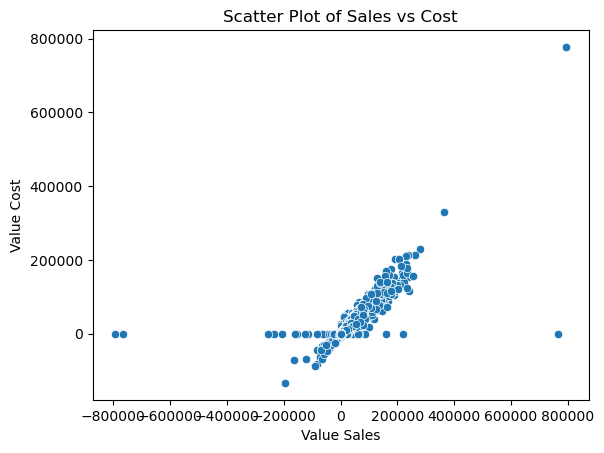

In [87]:
# Scatter plot of 'value_sales' vs 'value_cost'
sns.scatterplot(x='value_sales_aud', y='value_cost_aud', data=combined)
plt.title('Scatter Plot of Sales vs Cost')
plt.xlabel('Value Sales')
plt.ylabel('Value Cost')
plt.show()

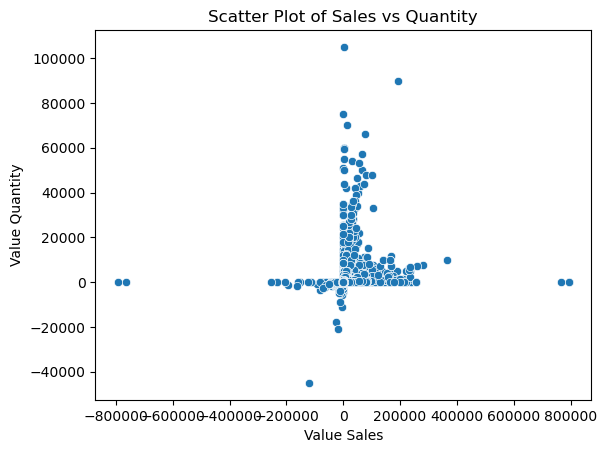

In [88]:
# Scatter plot of 'value_sales' vs 'value_cost'
sns.scatterplot(x='value_sales_aud', y='value_quantity', data=combined)
plt.title('Scatter Plot of Sales vs Quantity')
plt.xlabel('Value Sales')
plt.ylabel('Value Quantity')
plt.show()

#### Negative values

In [89]:
# Filter data for negative values in value_sales, value_cost, or value_quantity
negative_values = combined[(combined['value_sales_aud'] < 0) | 
                           (combined['value_cost_aud'] < 0) | 
                           (combined['value_quantity'] < 0)]

# Count the number of records with negative values for each order type
negative_counts_by_order_type = negative_values.groupby('order_type_code').size()
negative_counts_by_order_type

order_type_code
CDG    12282
CPR      616
CRD    47507
CRP      294
CRR    45809
NOH      374
NOR     3576
PMO        1
ZCG     1931
ZCR     1402
dtype: int64

The negative values according to order_type_code are primarily due to credit for goods returns, except for NOH, NOR and PMO, which assume to be result from internal goods transfers between warehouse. Since internal transfers are not interested to our analysis, we will drop all records with these order types.

In [90]:
# Define the order types to filter
order_types_to_drop = ['PMO', 'NOH', 'NOR']

# Drop rows with negative values in specified order types
combined = combined[~((combined['order_type_code'].isin(order_types_to_drop)) & 
                      ((combined['value_sales_aud'] < 0) | 
                       (combined['value_cost_aud'] < 0) | 
                       (combined['value_quantity'] < 0)))]

In [91]:
combined.shape

(1969719, 40)

#### Investigate Quantity = 0

In [92]:
# Filter data for zero values in quantity
zero_qty = combined[(combined['value_quantity'] == 0)]
zero_qty

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,invoice_date,customer_order_number,order_date,month_year,business_area_name,value_cost_aud,value_sales_aud,value_price_adjustment_aud
625,2012-01-13,2012,7,2012,1,13,101,400800600,400,GENIE18WCDLES,...,AUD,2172282,2012-01-13,6120639,2012-01-13,Jan-12,Lamps,0.0000,-79.7500,1.0000
995,2012-01-18,2012,7,2012,1,18,101,471000805,400,GENIE14WCDLBC,...,AUD,2173898,2012-01-18,6120786,2012-01-18,Jan-12,Lamps,0.0000,-70.5600,1.0000
996,2012-01-18,2012,7,2012,1,18,101,471000805,400,GENIE14WCDLBC,...,AUD,2173900,2012-01-18,6120790,2012-01-18,Jan-12,Lamps,0.0000,-1008.4200,1.0000
2366,2012-01-11,2012,7,2012,1,11,101,610910704,600,GIGA2000MH,...,AUD,2171414,2012-01-11,6120592,2012-01-11,Jan-12,Flood,0.0000,-68.0800,1.0000
2714,2012-01-30,2012,7,2012,1,30,101,299480720,200,GENIE18WWWBC,...,AUD,2177957,2012-01-30,6121106,2012-01-30,Jan-12,Lamps,0.0000,-3.4800,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973294,2013-08-20,2014,2,2013,8,20,205,630600406,600,20542,...,AUD,287549,2013-08-20,287549,2013-08-20,Aug-13,Surface,0.0000,-7.5700,1.0000
1973416,2013-10-17,2014,4,2013,10,17,950,Z40000009,540,BWP/T258H,...,NZD,149809,2013-10-17,6140334,2013-10-17,Oct-13,Surface,0.0000,-308.0400,0.8500
1973433,2013-07-05,2014,1,2013,7,5,950,Z41000014,530,BWP/T258H,...,NZD,141819,2013-07-05,6136777,2013-07-05,Jul-13,Surface,0.0000,-106.2160,0.8500
1973531,2013-08-06,2014,2,2013,8,6,205,301600200,300,140033,...,AUD,644159,2013-08-06,9068264,2013-08-06,Aug-13,Lamps,0.0000,-259.5000,1.0000


## Section 2: Exploratory Data

#### Transactions by order_type_code

order_type_code	
NOR	NOR - Normal Order
EDI	EDI - Edi Order
CDG	CDG - Credit Damaged Goods Not Returned
PRO	PRO - Project Order
NOS	NOS - Normal Order - Site Delivery Direct
CRR	CRR - Credit Goods Return
EXP	EXP - Export Order
CSH	CSH - Cash Order
PRD	PRD - Project Order - Site Delivery
CRD	CRD - Credit Price Only
NOH	NOH - Normal Order Head Office Sales
COP	COP - Charge Only - Price Adjustment
MIN	MIN - Minimum Sell Override
COA	COA - Charge Only - Stock Adjustment
PSA	PSA - Project Sample For Approval
WDC	WDC - Wrong Delivery Charge
PMO	PMO - Project Order - Moonlighting
CPR	CPR - Credit Project Goods Return
CRP	CRP - Credit Project Price Only
AES	AES - Aesthetics Lighting Only
ZCG	ZCG - Credit Goods Return - Pnz Only
ZCR	ZCR - Credit Price - Pnz Only
SPC	SPC - Specialty Order
PUP	PUP - Pick Up Order

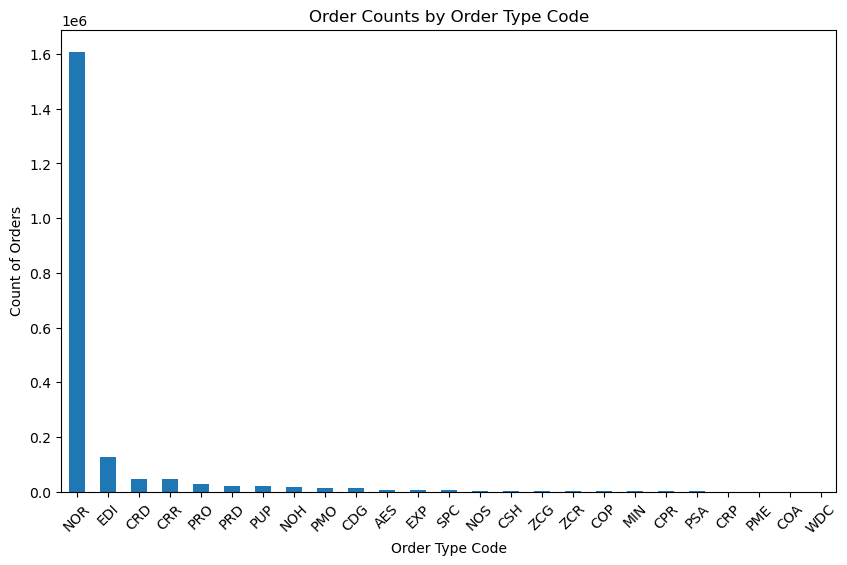

In [93]:
order_counts = combined['order_type_code'].value_counts()

# Plotting bar chart
plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar')
plt.title("Order Counts by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Count of Orders")
plt.xticks(rotation=45)
plt.show()

In [94]:
nor_order = combined[combined['order_type_code'] == 'NOR']

## Time gap between order date and invoice date

In [95]:
time_gap = nor_order.copy()

# Convert 'order_date' and 'invoice_date' to datetime if they are not already
time_gap['order_date'] = pd.to_datetime(time_gap['order_date'])
time_gap['invoice_date'] = pd.to_datetime(time_gap['invoice_date'])

# Calculate the time difference
time_gap['time_gap'] = time_gap['invoice_date'] - time_gap['order_date']

# Convert the time difference to days
time_gap['time_gap_days'] = time_gap['time_gap'].dt.days

# Display the first few rows to check the output
print(time_gap[['order_date', 'invoice_date', 'time_gap', 'time_gap_days']].head(20))

   order_date invoice_date time_gap  time_gap_days
0  2012-05-09   2012-05-09   0 days              0
1  2012-02-16   2012-02-16   0 days              0
2  2012-05-08   2012-05-09   1 days              1
5  2012-05-03   2012-05-04   1 days              1
6  2012-06-26   2012-06-26   0 days              0
7  2012-06-05   2012-06-05   0 days              0
8  2012-06-22   2012-06-22   0 days              0
9  2012-04-03   2012-04-03   0 days              0
10 2012-04-18   2012-04-18   0 days              0
11 2012-01-11   2012-01-18   7 days              7
12 2012-01-17   2012-01-17   0 days              0
13 2012-03-29   2012-04-20  22 days             22
14 2012-04-03   2012-04-04   1 days              1
15 2012-04-23   2012-04-23   0 days              0
16 2012-01-25   2012-01-25   0 days              0
17 2012-04-27   2012-04-27   0 days              0
20 2012-03-19   2012-03-19   0 days              0
21 2012-06-06   2012-06-06   0 days              0
23 2012-02-10   2012-02-10   0 

In [96]:
time_gap.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_quantity,invoice_date,order_date,value_cost_aud,value_sales_aud,value_price_adjustment_aud,time_gap,time_gap_days
count,1608956,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956,1608956,1608956.0000,1608956.0000,1608956.0000,1608956,1608956.0000
mean,2012-12-16 18:00:00.912890368,2012.9579,6.5616,2012.4769,6.3331,15.3931,26.2149,2012-12-16 18:00:00.912890368,2012-12-14 04:48:40.961915904,228.3859,353.4950,0.0000,2 days 13:11:19.950974420,2.5495
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,0.7500,2012-01-02 00:00:00,2010-11-15 00:00:00,0.0000,0.0000,0.0000,0 days 00:00:00,0.0000
25%,2012-06-15 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,3.0000,2012-06-15 00:00:00,2012-06-14 00:00:00,10.4030,25.8000,0.0000,0 days 00:00:00,0.0000
50%,2012-12-05 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,8.0000,2012-12-05 00:00:00,2012-12-04 00:00:00,30.0100,65.1100,0.0000,0 days 00:00:00,0.0000
75%,2013-06-18 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,20.0000,2013-06-18 00:00:00,2013-06-14 00:00:00,89.6411,177.5800,0.0000,1 days 00:00:00,1.0000
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,89650.0000,2013-12-31 00:00:00,2013-12-30 00:00:00,777669.2000,793541.9800,0.0000,652 days 00:00:00,652.0000
std,NaN,0.7084,3.6363,0.4995,3.2312,8.6855,209.8656,NaN,NaN,1939.6117,2512.6585,0.0000,12 days 12:11:18.749883996,12.5079


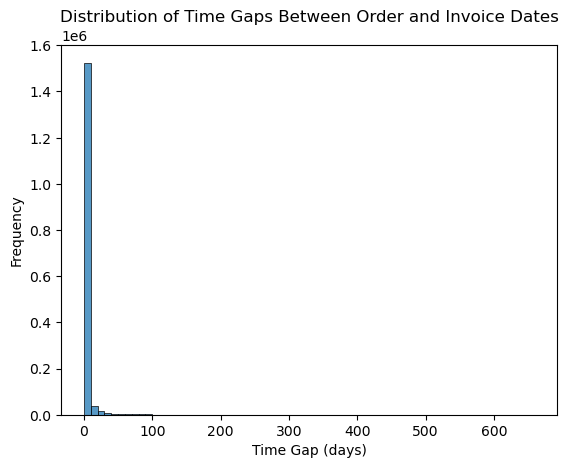

In [97]:
# Histogram to view the distribution of time gaps

max_days = time_gap['time_gap_days'].max()
bin_width = 10  # You can change this to any number that suits your analysis

# Create bins from 0 to max_days with each bin having a width of 'bin_width'
bins = np.arange(0, max_days + bin_width, bin_width)

# Plot the histogram with these bins
sns.histplot(time_gap['time_gap_days'], bins=bins, kde=False)
plt.title('Distribution of Time Gaps Between Order and Invoice Dates')
plt.xlabel('Time Gap (days)')
plt.ylabel('Frequency')
# plt.ylim(0, 500)  # Adjust based on your frequency distribution
plt.show()

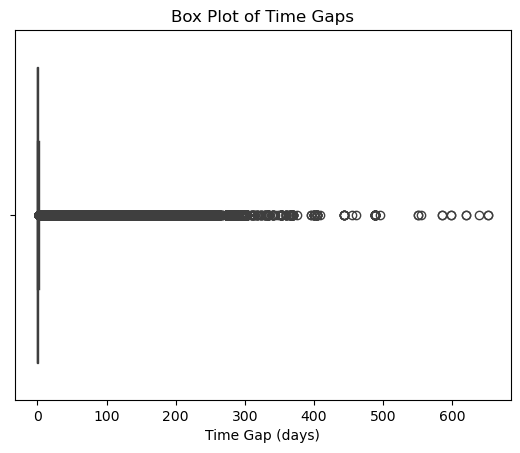

In [98]:
# Box plot to visualize outliers
sns.boxplot(x=time_gap['time_gap_days'])
plt.title('Box Plot of Time Gaps')
plt.xlabel('Time Gap (days)')
plt.show()

#### Explore the features impact on the Time Gap (days)

By Business Area

1. Overall distribution by business  

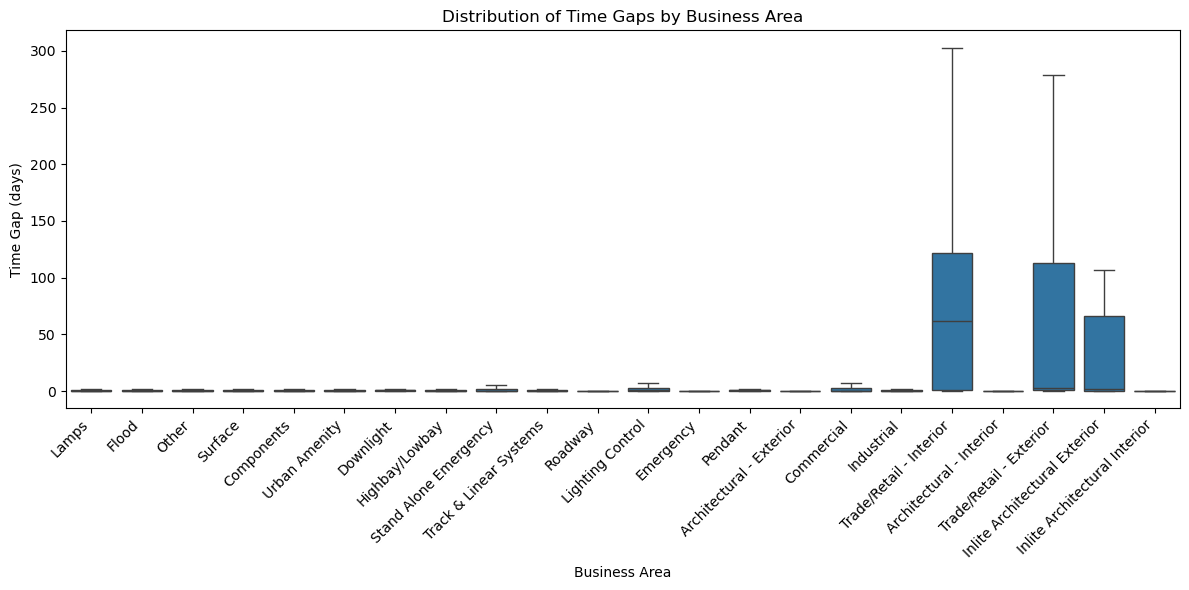

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_gap, x='business_area_name', y='time_gap_days', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Time Gaps by Business Area')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()

2. Calculate summary statistics by business area

In [100]:
business_area_stats = time_gap.groupby('business_area_name')['time_gap_days'].agg([
    'count',
    'mean',
    'median',
    'std',
    ('q25', lambda x: x.quantile(0.25)),
    ('q75', lambda x: x.quantile(0.75))
]).round(2)

print("\nSummary statistics by business area:")
print(business_area_stats.sort_values('count', ascending=False))


Summary statistics by business area:
                                count    mean  median     std    q25      q75
business_area_name                                                           
Lamps                          728830  1.4000  0.0000  6.6600 0.0000   1.0000
Surface                        307910  3.2500  0.0000 13.6400 0.0000   1.0000
Components                     165718  2.5000  0.0000 12.0900 0.0000   1.0000
Other                          129313  2.2500  0.0000 10.1000 0.0000   1.0000
Downlight                       74953  2.9400  1.0000 10.6800 0.0000   1.0000
Flood                           69626  6.3900  0.0000 21.5900 0.0000   1.0000
Track & Linear Systems          45559  1.6900  0.0000  8.1400 0.0000   1.0000
Urban Amenity                   23050  2.5100  0.0000 10.6300 0.0000   1.0000
Roadway                         16781  0.6100  0.0000  4.5800 0.0000   0.0000
Stand Alone Emergency           14774  3.2800  0.0000  8.7800 0.0000   2.0000
Highbay/Lowbay            

3. Create a violin plot to see the distribution shape

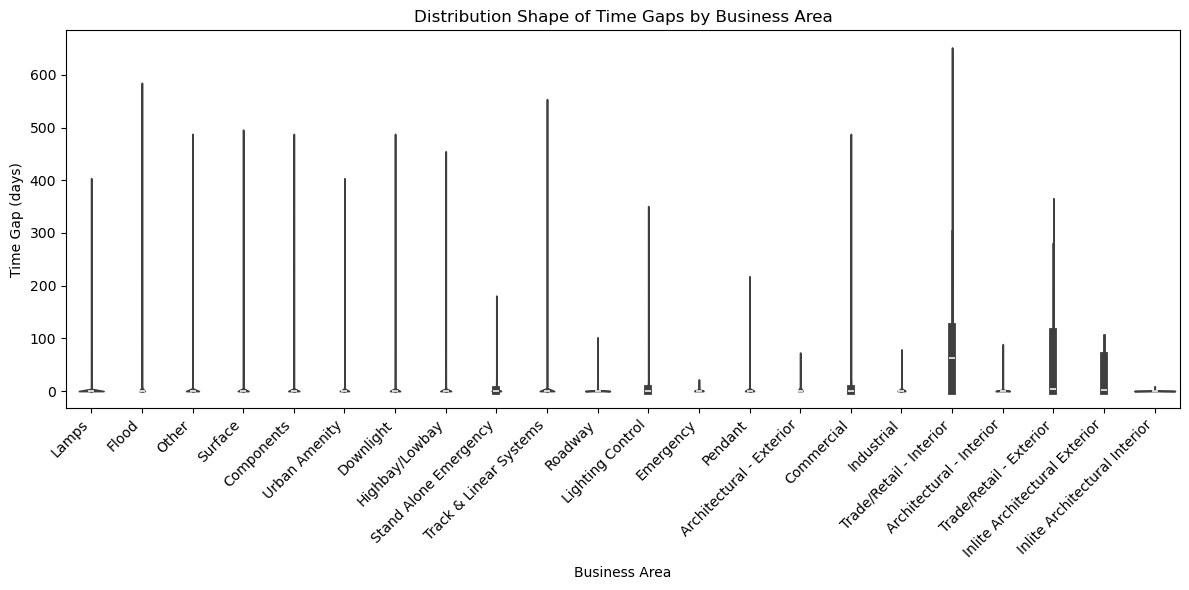

In [101]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_gap, x='business_area_name', y='time_gap_days', cut=0)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution Shape of Time Gaps by Business Area')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()

As we can see from the violin plot, the distribution shape of time gaps by business area is not normal. There are some outliers in the data. So, we will remove them by using the IQR method.

Removed 215124 records (13.37% of total)


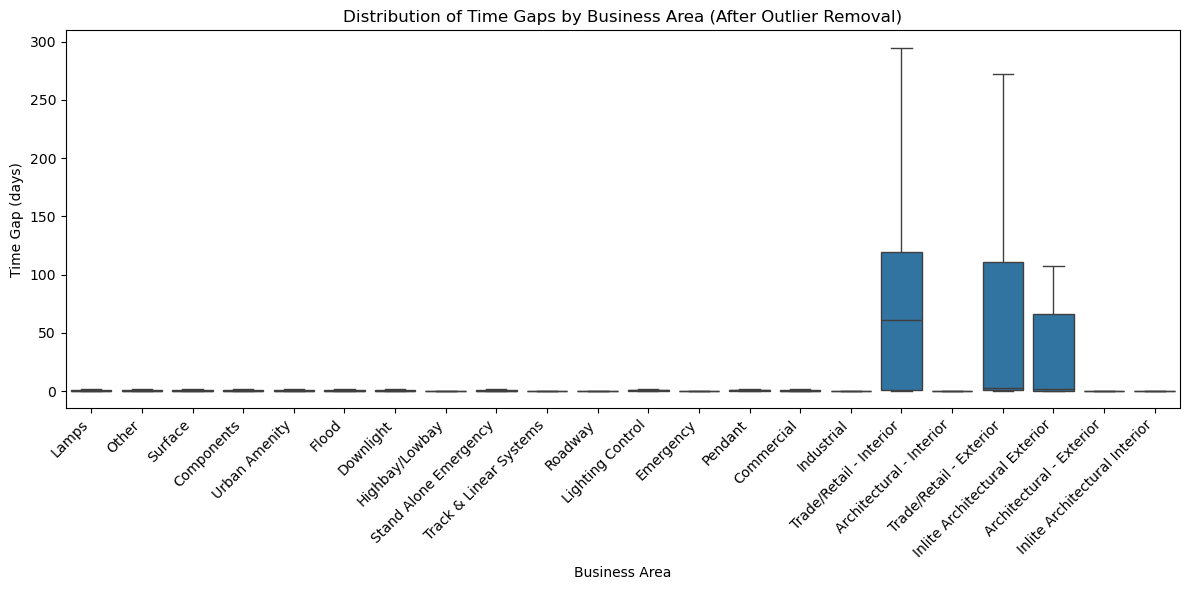

In [102]:
# Calculate outlier bounds for each business area
def remove_outliers_by_group(df, group_col, value_col):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Calculate Q1, Q3, and IQR for each business area
    stats = df.groupby(group_col)[value_col].agg([
        ('q1', lambda x: x.quantile(0.25)),
        ('q3', lambda x: x.quantile(0.75)),
        'count'
    ])
    
    # Calculate IQR and bounds
    stats['iqr'] = stats['q3'] - stats['q1']
    stats['lower_bound'] = stats['q1'] - 1.5 * stats['iqr']
    stats['upper_bound'] = stats['q3'] + 1.5 * stats['iqr']
    
    # Create a mask for valid records
    mask = pd.Series(False, index=df.index)
    
    # Apply bounds for each business area
    for area in df[group_col].unique():
        area_mask = (df[group_col] == area) & \
                   (df[value_col] >= stats.loc[area, 'lower_bound']) & \
                   (df[value_col] <= stats.loc[area, 'upper_bound'])
        mask = mask | area_mask
    
    # Apply the mask and reset index
    df_clean = df_clean[mask].reset_index(drop=True)
    
    # Print summary of removed records
    removed_count = len(df) - len(df_clean)
    print(f"Removed {removed_count} records ({(removed_count/len(df)*100):.2f}% of total)")
    
    return df_clean

# Remove outliers
time_gap_clean = remove_outliers_by_group(time_gap, 'business_area_name', 'time_gap_days')

# Create a box plot to visualize the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_gap_clean, x='business_area_name', y='time_gap_days', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Time Gaps by Business Area (After Outlier Removal)')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()